# Statistiques sur les trains TGV de la SNCF

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [6]:
df = pd.read_csv('data/regularite-mensuelle-tgv-aqst.csv', delimiter=";")
df.head()

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Commentaire annulations,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,...,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
0,2018-01,National,ANGERS SAINT LAUD,PARIS MONTPARNASSE,91,393,2,NaN,204,6.400490,...,35,6.072847,19,4,37.500000,37.500000,8.928571,5.357143,8.928571,1.785714
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,BORDEAUX ST JEAN,143,775,7,NaN,148,9.377815,...,45,2.546962,21,4,21.666667,25.000000,11.666667,40.000000,1.666667,0.000000
3,2018-01,National,PARIS MONTPARNASSE,LAVAL,84,217,0,NaN,32,11.609375,...,16,5.822811,5,2,24.242424,54.545455,3.030303,12.121212,3.030303,3.030303
4,2018-01,National,PARIS MONTPARNASSE,NANTES,124,508,3,NaN,71,7.235211,...,39,5.292211,18,8,33.333333,22.222222,16.666667,20.370370,5.555556,1.851852


In [7]:
df.shape

(6324, 26)

In [8]:
df.isna().sum()

Date                                                                                              0
Service                                                                                           0
Gare de départ                                                                                    0
Gare d'arrivée                                                                                    0
Durée moyenne du trajet                                                                           0
Nombre de circulations prévues                                                                    0
Nombre de trains annulés                                                                          0
Commentaire annulations                                                                        6324
Nombre de trains en retard au départ                                                              0
Retard moyen des trains en retard au départ                                                       0


Suppression des colonnes possédant des données manquantes

In [9]:
df.dropna(axis = 1, inplace = True)
df.shape

(6324, 23)

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(6324, 23)

In [11]:
df.describe()

,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,168.364485,244.284472,11.543801,89.404491,10.386532,2.975748,31.871917,33.008380,5.288479,22.453985,28.313645,10.459519,3.711259,24.385401,22.869181,18.234726,18.245399,6.257706,6.481338
std,86.273859,165.248615,27.182925,91.760544,13.383193,5.835297,27.726689,15.554139,8.712921,19.353596,19.850033,9.876564,4.246828,17.445229,16.477759,14.958479,14.275646,8.157455,10.547854
min,0.000000,0.000000,0.000000,0.000000,0.000000,-229.269444,0.000000,-40.109259,-472.638889,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,133.750000,0.000000,21.000000,4.418838,1.028414,12.000000,23.611046,2.926658,9.000000,7.739368,4.000000,1.000000,12.500000,12.121212,7.692308,8.571429,0.000000,0.000000
50%,162.000000,210.000000,3.000000,57.000000,7.965843,2.148165,25.000000,31.438492,4.681114,18.000000,31.223264,8.000000,2.000000,22.222222,20.930233,16.642764,16.666667,4.545455,2.518366
75%,219.000000,315.000000,10.000000,131.000000,12.877041,3.752811,44.000000,40.429394,7.219683,31.000000,40.984239,15.000000,5.000000,33.333333,31.034483,26.315789,25.000000,9.090909,8.333333
max,786.000000,973.000000,288.000000,591.000000,316.188095,84.516667,239.000000,255.866667,92.000000,192.000000,255.866667,91.000000,39.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## Coordonnées

Afin de pouvoir visualiser nos données sur une carte, et comparer certaines grandeurs en fonction des régions, on télécharge un deuxième dataset contenant les coordonnées des gares

In [12]:
coord = pd.read_csv('data/referentiel-gares-voyageurs.csv', delimiter=";").drop(['Date fin validité plateforme', 'SOPs'], axis=1).dropna()
coord.head()

,Code plate-forme,Code gare,Code UIC,Intitulé plateforme,Code postal,Code Commune,Commune,Code département,Département,Longitude,...,Intitulé fronton de gare,Gare DRG,Gare étrangère,DTG,Région SNCF,Unité gare,UT,Nbre plateformes,TVS,WGS 84
1,00004-1,4,87785006,Cerbère,66290.0,48.0,Cerbère,66.0,Pyrénées-Orientales,3.163403,...,Cerbère,True,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,CERBERE GARE,1,CER,"42.4417732,3.1634033"
2,00006-1,6,87784884,Ur - Les Escaldes,66760.0,218.0,Ur,66.0,Pyrénées-Orientales,1.940482,...,Ur les Escaldes,True,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,UR LES ESCALDES GARE,1,URL,"42.457481,1.9404821"
3,00022-1,22,87784728,Olette - Canaveilles,66360.0,125.0,Olette,66.0,Pyrénées-Orientales,2.271931,...,Olette - Canaveilles les Bains,True,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,OLETTE CANAVEILLES LES BAINS GARE,1,OLE,"42.55472,2.2719309"
4,00027-1,27,87784637,Prades - Molitg-les-Bains,66500.0,149.0,Prades,66.0,Pyrénées-Orientales,2.429418,...,Prades - Molitg-les-Bains,True,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,PRADES MOLITG LES BAINS GARE,1,PDS,"42.6170988,2.4294184"
5,00047-1,47,87783563,Barjac,48000.0,18.0,Barjac,48.0,Lozère,3.410979,...,Barjac,True,False,DRG Occitanie Sud,REGION LANGUEDOC-ROUSSILLON,UG Est Occitanie,BARJAC GARE,1,BJC,"44.4992638,3.4109786"


Pour plus de lisibilité, on rassemble les gares parisiennes dans la région "Ile de France", et on retire le mot "Région" de la colonne région

In [13]:
coord['Région SNCF'] = coord['Région SNCF'].map(lambda s: s.replace("REGION ", ""))
coord['Région SNCF'] = coord['Région SNCF'].map(lambda s: "ILE DE FRANCE" if "PARIS" in s else s)

Afin de pouvoir joindre nos deux dataframe, il faut qu'on fasse correspondre nos gares d'arrivée et de départ aux colonnes "Intitulé fronton de gare" et "UT". Pour cela, il faut que l'on transforme un peu ces colonnes :

In [14]:
coord['UT'] = coord['UT'].astype(str)
coord['UT'] = coord['UT'].map(lambda s: s.replace(" GARE", ""))

coord['Intitulé fronton de gare'] = coord['Intitulé fronton de gare'].astype(str).map(lambda s: s.upper())

In [15]:
gares = pd.DataFrame(df['Gare de départ'].unique(), columns=['Gare'])
gares.shape

(59, 1)

In [16]:
gares_1 = pd.merge(gares, coord[['UT', 'Région SNCF', 'WGS 84']], left_on='Gare', right_on='UT', how='left').drop('UT', axis=1).dropna().drop_duplicates()
gares_1.shape

(31, 3)

In [17]:
gares_2 = pd.merge(gares, coord[['Intitulé fronton de gare', 'Région SNCF', 'WGS 84']], left_on='Gare', right_on='Intitulé fronton de gare', how='left').drop('Intitulé fronton de gare', axis=1).dropna().drop_duplicates()
gares_2.shape

(25, 3)

In [18]:
gares = pd.concat([gares_1, gares_2]).drop_duplicates()
gares.shape

(38, 3)

On va maintenant pouvoir convertir les coordonnées en "Point", puis créer un GeoDataFrame que l'on pourra utiliser afin de visualiser nos données sur une carte

In [19]:
geometry = [Point((v, u)) for u, v in [list(map(float,x.split(','))) for x in gares['WGS 84']]]

In [20]:
crs = 'epsg:4326'

In [21]:
df_gares = gpd.GeoDataFrame(gares, crs=crs, geometry=geometry)

In [22]:
del df_gares['WGS 84']
df_gares.head()

,Gare,Région SNCF,geometry
1,LA ROCHELLE VILLE,POITOU-CHARENTES AQUITAINE,POINT (-1.14531 46.15269)
6,PARIS NORD,ILE DE FRANCE,POINT (2.35515 48.88018)
10,ANNECY,ALPES,POINT (6.12183 45.90196)
12,MONTPELLIER,LANGUEDOC-ROUSSILLON,POINT (3.88067 43.60474)
14,PARIS LYON,ILE DE FRANCE,POINT (2.37352 48.84489)


On peut dorénavant associer les coordonnées de départ et d'arrivée à chaque trajet

In [23]:
df_coord = pd.merge(df, df_gares, left_on='Gare de départ', right_on='Gare', how='left', suffixes=(None, "_départ")).drop('Gare', axis=1).dropna().drop_duplicates()
df_coord.rename({'geometry': 'Coord_départ', 'Région SNCF': 'Région_départ'}, axis=1, inplace=True)
df_coord.shape

(6354, 25)

In [24]:
df_coord = pd.merge(df_coord, df_gares, left_on='Gare d\'arrivée', right_on='Gare', how='left', suffixes=(None, "_arrivée")).drop('Gare', axis=1).dropna().drop_duplicates()
df_coord.rename({'geometry': 'Coord_arrivée', 'Région SNCF': 'Région_arrivée'}, axis=1, inplace=True)
df_coord.shape

(5262, 27)

In [25]:
len(df_coord[df_coord.Service == 'International'])

0

Comme on ne possède pas d'information sur les gares à l'international, on peut supprimer la colonne "Service"

In [26]:
del df_coord['Service']
df_coord.head()

,Date,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Nombre de trains en retard à l'arrivée,...,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)",Région_départ,Coord_départ,Région_arrivée,Coord_arrivée
0,2018-01,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,8,2.875000,0.095796,34,...,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,POITOU-CHARENTES AQUITAINE,POINT (-1.14531 46.15269),ILE DE FRANCE,POINT (2.32051 48.84117)
1,2018-01,PARIS MONTPARNASSE,BORDEAUX ST JEAN,143,775,7,148,9.377815,1.582530,79,...,21.666667,25.000000,11.666667,40.000000,1.666667,0.000000,ILE DE FRANCE,POINT (2.32051 48.84117),POITOU-CHARENTES AQUITAINE,POINT (-0.55670 44.82587)
2,2018-01,PARIS MONTPARNASSE,LAVAL,84,217,0,32,11.609375,1.455760,66,...,24.242424,54.545455,3.030303,12.121212,3.030303,3.030303,ILE DE FRANCE,POINT (2.32051 48.84117),PAYS DE LA LOIRE,POINT (-0.76091 48.07621)
3,2018-01,PARIS MONTPARNASSE,NANTES,124,508,3,71,7.235211,0.734290,58,...,33.333333,22.222222,16.666667,20.370370,5.555556,1.851852,ILE DE FRANCE,POINT (2.32051 48.84117),PAYS DE LA LOIRE,POINT (-1.54236 47.21615)
5,2018-01,PARIS MONTPARNASSE,TOULOUSE MATABIAU,257,182,1,38,10.412281,1.958748,21,...,47.619048,28.571429,0.000000,19.047619,4.761905,0.000000,ILE DE FRANCE,POINT (2.32051 48.84117),MIDI PYRENEES,POINT (1.45362 43.61121)


In [27]:
df_coord['Date'] = pd.to_datetime(df_coord['Date'])

In [28]:
df_coord.set_index('Date', inplace=True)

In [63]:
df_départ = df_coord.groupby([df_coord.index.to_period("Y"), "Gare de départ"]).mean().reset_index()
df_départ = pd.merge(df_départ, df_gares, left_on='Gare de départ', right_on='Gare', how='left', suffixes=(None, "_arrivée")).drop('Gare', axis=1).dropna().drop_duplicates().set_index('Date')

df_arrivée = df_coord.groupby([df_coord.index.to_period("Y"), "Gare d\'arrivée"]).mean().reset_index().set_index('Date')
df_région_départ = df_coord.groupby([df_coord.index.to_period("Y"), "Région_départ"]).mean().reset_index().set_index('Date')
df_région_arrivée = df_coord.groupby([df_coord.index.to_period("Y"), "Région_arrivée"]).mean().reset_index().set_index('Date')

df_départ

,Gare de départ,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,...,Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)",Région SNCF,geometry
Date,,,,,,,,,,,,,,,,,,,,,
2018,ANNECY,226.333333,183.750000,15.666667,15.583333,11.003223,1.011386,45.416667,35.224149,11.336622,...,18.333333,5.166667,30.971833,23.246582,25.669370,14.097670,4.358435,1.656110,ALPES,POINT (6.12183 45.90196)
2018,ARRAS,51.083333,333.916667,38.333333,109.000000,9.203392,3.201593,80.416667,17.764283,5.581694,...,10.000000,4.000000,15.296356,24.102809,40.453120,12.556896,6.100829,1.489991,NORD PAS DE CALAIS,POINT (2.78194 50.28667)
2018,AVIGNON TGV,159.750000,544.166667,27.333333,206.666667,12.000660,4.263934,99.833333,34.218605,7.142857,...,35.166667,13.416667,27.896814,23.257261,23.486440,17.371770,4.280433,3.707282,PROVENCE ALPES COTE D'AZUR,POINT (4.78608 43.92159)
2018,BELLEGARDE (AIN),162.500000,231.916667,17.750000,89.583333,8.402238,3.135938,43.416667,35.102607,7.628466,...,17.250000,5.750000,33.648365,15.626269,22.211596,9.080057,6.472695,4.627684,ALPES,POINT (5.82348 46.10943)
2018,BORDEAUX ST JEAN,220.541667,424.875000,42.250000,124.916667,9.495787,2.813213,66.916667,38.195826,9.385240,...,19.750000,6.083333,21.028294,26.995802,31.592186,12.936899,2.474226,4.972592,POITOU-CHARENTES AQUITAINE,POINT (-0.55670 44.82587)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,TOULON,238.666667,256.000000,0.333333,41.000000,18.263188,2.829230,20.666667,54.788925,4.150552,...,14.333333,4.333333,39.636752,10.683761,23.931624,5.341880,2.670940,17.735043,PROVENCE ALPES COTE D'AZUR,POINT (5.92929 43.12837)
2022,TOULOUSE MATABIAU,267.000000,204.000000,4.333333,20.000000,17.127137,1.711060,25.000000,58.145784,9.362715,...,16.333333,7.333333,37.250233,36.493931,8.865546,7.492997,1.111111,8.786181,MIDI PYRENEES,POINT (1.45362 43.61121)
2022,TOURCOING,312.666667,30.000000,0.666667,4.000000,18.352778,2.638243,4.333333,31.001389,5.041690,...,1.666667,0.333333,8.333333,31.666667,6.666667,40.000000,0.000000,13.333333,NORD PAS DE CALAIS,POINT (3.16804 50.71683)


In [64]:
# df_arrivée

## Visualisations

In [31]:
# df_région_départ.groupby('Région_départ')['Durée moyenne du trajet'].plot(legend=True)

In [32]:
# df_région_départ.groupby('Région_départ')['Nombre de circulations prévues'].plot(legend=True)

In [33]:
# df_région_départ.groupby('Région_départ')['Nombre de trains annulés'].plot(legend=True)

In [34]:
# df_région_départ['Pourcentage de trains annulés'] = df_départ['Nombre de trains annulés'] / df_départ['Nombre de circulations prévues'] * 100
# df_région_départ.groupby('Région_départ')['Pourcentage de trains annulés'].plot(legend=True)

In [35]:
# df_région_arrivée.groupby('Région_arrivée')['Durée moyenne du trajet'].plot(legend=True)

In [57]:
france = gpd.read_file('data/france.shp')
france[france['RégION'] == 'Ile-de-France']

,RégION,geometry
8,Ile-de-France,"POLYGON ((546804.268 2453536.973, 546887.215 2..."


In [37]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
europe = world[world.continent == 'Europe'].copy()
europe['geometry'] = europe.geometry.intersection(Polygon([(-10,35), (50,35), (50,70), (-10, 70)]))
france = europe[europe.name == 'France']
france.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0..."


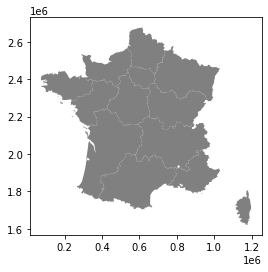

In [59]:
ax = france.plot(color="grey")
# df_gares.plot(ax=ax)
# df_coord.set_geometry('Coord_départ')
# df_coord.plot(ax=ax, color = 'red')

In [38]:
df_gares.head()

,Gare,Région SNCF,geometry
1,LA ROCHELLE VILLE,POITOU-CHARENTES AQUITAINE,POINT (-1.14531 46.15269)
6,PARIS NORD,ILE DE FRANCE,POINT (2.35515 48.88018)
10,ANNECY,ALPES,POINT (6.12183 45.90196)
12,MONTPELLIER,LANGUEDOC-ROUSSILLON,POINT (3.88067 43.60474)
14,PARIS LYON,ILE DE FRANCE,POINT (2.37352 48.84489)


In [60]:
df_coord.head()

,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,...,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)",Région_départ,Coord_départ,Région_arrivée,Coord_arrivée
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,8,2.875000,0.095796,34,21.524020,...,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,POITOU-CHARENTES AQUITAINE,POINT (-1.14531 46.15269),ILE DE FRANCE,POINT (2.32051 48.84117)
2018-01-01,PARIS MONTPARNASSE,BORDEAUX ST JEAN,143,775,7,148,9.377815,1.582530,79,25.479114,...,21.666667,25.000000,11.666667,40.000000,1.666667,0.000000,ILE DE FRANCE,POINT (2.32051 48.84117),POITOU-CHARENTES AQUITAINE,POINT (-0.55670 44.82587)
2018-01-01,PARIS MONTPARNASSE,LAVAL,84,217,0,32,11.609375,1.455760,66,15.134343,...,24.242424,54.545455,3.030303,12.121212,3.030303,3.030303,ILE DE FRANCE,POINT (2.32051 48.84117),PAYS DE LA LOIRE,POINT (-0.76091 48.07621)
2018-01-01,PARIS MONTPARNASSE,NANTES,124,508,3,71,7.235211,0.734290,58,33.726437,...,33.333333,22.222222,16.666667,20.370370,5.555556,1.851852,ILE DE FRANCE,POINT (2.32051 48.84117),PAYS DE LA LOIRE,POINT (-1.54236 47.21615)
2018-01-01,PARIS MONTPARNASSE,TOULOUSE MATABIAU,257,182,1,38,10.412281,1.958748,21,57.180952,...,47.619048,28.571429,0.000000,19.047619,4.761905,0.000000,ILE DE FRANCE,POINT (2.32051 48.84117),MIDI PYRENEES,POINT (1.45362 43.61121)


In [40]:
import folium

In [55]:
france = folium.Map(location=[46.8,2], zoom_start=6)

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in df_gares.geometry]

for i in range(len(geo_df_list)):
    type_color = 'green'

    france.add_child(folium.Marker(location = geo_df_list[i],
                            popup ="Gare: " + df_gares['Gare'].iloc[i] + '<br>' +
                            "Région SNCF: " + df_gares['Région SNCF'].iloc[i] + '<br>'+
                            "Coordinates: " + str(geo_df_list[i]),
                            icon = folium.Icon(color = "%s" % type_color)))

In [67]:
# france

In [71]:
df_coord.head()

,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,...,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)",Région_départ,Coord_départ,Région_arrivée,Coord_arrivée
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,8,2.875000,0.095796,34,21.524020,...,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,POITOU-CHARENTES AQUITAINE,POINT (-1.14531 46.15269),ILE DE FRANCE,POINT (2.32051 48.84117)
2018-01-01,PARIS MONTPARNASSE,BORDEAUX ST JEAN,143,775,7,148,9.377815,1.582530,79,25.479114,...,21.666667,25.000000,11.666667,40.000000,1.666667,0.000000,ILE DE FRANCE,POINT (2.32051 48.84117),POITOU-CHARENTES AQUITAINE,POINT (-0.55670 44.82587)
2018-01-01,PARIS MONTPARNASSE,LAVAL,84,217,0,32,11.609375,1.455760,66,15.134343,...,24.242424,54.545455,3.030303,12.121212,3.030303,3.030303,ILE DE FRANCE,POINT (2.32051 48.84117),PAYS DE LA LOIRE,POINT (-0.76091 48.07621)
2018-01-01,PARIS MONTPARNASSE,NANTES,124,508,3,71,7.235211,0.734290,58,33.726437,...,33.333333,22.222222,16.666667,20.370370,5.555556,1.851852,ILE DE FRANCE,POINT (2.32051 48.84117),PAYS DE LA LOIRE,POINT (-1.54236 47.21615)
2018-01-01,PARIS MONTPARNASSE,TOULOUSE MATABIAU,257,182,1,38,10.412281,1.958748,21,57.180952,...,47.619048,28.571429,0.000000,19.047619,4.761905,0.000000,ILE DE FRANCE,POINT (2.32051 48.84117),MIDI PYRENEES,POINT (1.45362 43.61121)


In [73]:
france_line = folium.Map(location=[46.8,2], zoom_start=6)

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in df_gares.geometry]
départ = [[point.xy[1][0], point.xy[0][0]] for point in df_coord.Coord_départ]
arrivée = [[point.xy[1][0], point.xy[0][0]] for point in df_coord.Coord_arrivée]

for i in range(len(geo_df_list)):
    type_color = 'green'
    france_line.add_child(folium.Marker(location = geo_df_list[i],
                            popup ="Gare: " + df_gares['Gare'].iloc[i] + '<br>' +
                            "Région SNCF: " + df_gares['Région SNCF'].iloc[i] + '<br>'+
                            "Coordinates: " + str(geo_df_list[i]),
                            icon = folium.Icon(color = "%s" % type_color)))
for i in range(len(départ)):
    folium.PolyLine((départ[i], arrivée[i]), color="red", weight=2.5, opacity=1).add_to(france_line)

In [75]:
# france_line